# Naive Bayes Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
hr_url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
hr = pd.read_csv(hr_url)

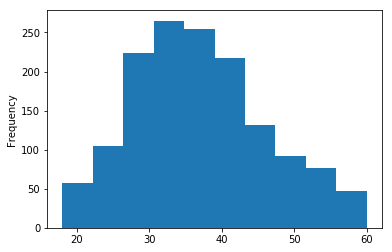

In [5]:
%matplotlib inline
hr['Age'].plot.hist()

In [6]:
bins = [0, 20, 40, 60, 80]
np.digitize([18, 55, 82], bins = bins)

array([1, 3, 5], dtype=int64)

In [7]:
hr['Age_bins'] = np.digitize(hr['Age'], bins = bins)
hr[['Age', 'Age_bins']].head()

,Age,Age_bins
0,41,3
1,49,3
2,37,2
3,33,2
4,27,2


In [13]:
## Dictionary comprehension to change age_bins to strings

{x: 'B' + str(x) for x in range(6)}

{0: 'B0', 1: 'B1', 2: 'B2', 3: 'B3', 4: 'B4', 5: 'B5'}

In [14]:
bin_labels = {x: 'B' + str(x) for x in range(6)}
hr['Age_bins'] = hr['Age_bins'].replace(bin_labels)
hr[['Age', 'Age_bins']].head()

,Age,Age_bins
0,41,B3
1,49,B3
2,37,B2
3,33,B2
4,27,B2


In [18]:
## to find quartiles

hr['Age'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00    18.0
0.25    30.0
0.50    36.0
0.75    43.0
1.00    60.0
Name: Age, dtype: float64

In [25]:
## to get bins and binning based on quartiles

bins = hr['Age'].quantile([0, 0.25, 0.5, 0.75, 1]).values

bin_labels = {x: 'B' + str(x) for x in range(len(bins))}
hr['Age_bins'] = np.digitize(hr['Age'], bins = bins)
hr['Age_bins'] = hr['Age_bins'].replace(bin_labels)
hr[['Age', 'Age_bins']].head()
#hr['Age_bins'].value_counts()

,Age,Age_bins
0,41,B3
1,49,B4
2,37,B3
3,33,B2
4,27,B1


In [24]:
hr._get_numeric_data().columns.drop('Attrition')

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
def num2cat(num_series):
    bins = num_series.quantile([0, 0.25, 0.5, 0.75, 1]).values
    bin_labels = {x: 'B' + str(x) for x in range(len(bins)+1)}
    cat_array = np.digitize(num_series, bins = bins)
    cat_series = pd.Series(cat_array)
    return (cat_series.replace(bin_labels))
num2cat(hr['Age']).head()

0    B3
1    B4
2    B3
3    B2
4    B1
dtype: object

In [31]:
num_cols = hr._get_numeric_data().columns.drop('Attrition')

df_cat = pd.DataFrame(columns = num_cols)

for col in num_cols:
    df_cat[col] = num2cat(hr[col])
df_cat.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,B3,B3,B1,B2,B5,B1,B2,B4,B4,B3,...,B1,B5,B2,B2,B1,B1,B3,B3,B2,B3
1,B4,B1,B3,B1,B5,B1,B3,B2,B2,B3,...,B5,B5,B4,B3,B4,B4,B4,B4,B3,B4
2,B3,B4,B2,B2,B5,B1,B5,B4,B2,B2,...,B2,B5,B2,B2,B4,B4,B1,B1,B2,B1
3,B2,B4,B2,B4,B5,B1,B5,B2,B4,B2,...,B3,B5,B2,B2,B4,B4,B3,B4,B4,B1
4,B1,B2,B2,B1,B5,B1,B1,B1,B4,B2,...,B5,B5,B4,B2,B4,B4,B1,B2,B3,B2


In [33]:
cat_cols = hr.columns.drop(num_cols)
cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Age_bins'],
      dtype='object')

In [35]:
df_final = pd.concat([df_cat, hr[cat_cols]], axis = 1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age_bins
0,B3,B3,B1,B2,B5,B1,B2,B4,B4,B3,...,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,B3
1,B4,B1,B3,B1,B5,B1,B3,B2,B2,B3,...,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,B4
2,B3,B4,B2,B2,B5,B1,B5,B4,B2,B2,...,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,B3
3,B2,B4,B2,B4,B5,B1,B5,B2,B4,B2,...,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,B2
4,B1,B2,B2,B1,B5,B1,B1,B1,B4,B2,...,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,B1


In [37]:
train, test = train_test_split(df_final, test_size = 0.3, random_state = 100)
train_y = train['Attrition']
test_y = test['Attrition']
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)


In [61]:
a = train[['Attrition', 'Gender']].query("Gender == 'Male'")
a.query("Attrition == 0").count()

Attrition    505
Gender       505
dtype: int64

In [80]:
pd.pivot_table(data = train, index='Attrition', columns='MaritalStatus', values='Gender', aggfunc=np.count_nonzero)

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,210,408,244
1,25,57,85


In [71]:
train[['Attrition', 'Gender']].query("Attrition == 0").count()

Attrition    862
Gender       862
dtype: int64

In [77]:
pd.pivot_table(data = train, index='Gender', columns='MaritalStatus', values='Attrition', aggfunc=len)

MaritalStatus,Divorced,Married,Single
Gender,,,
Female,88,192,139
Male,147,273,190


In [83]:
pd.pivot_table(data = train, index='Attrition', columns='Gender', aggfunc=np.count_nonzero)

Age      Age_bins      BusinessTravel      DailyRate       \
Gender    Female Male   Female Male         Female Male    Female Male   
Attrition                                                                
0            357  505      357  505            357  505       357  505   
1             62  105       62  105             62  105        62  105   

          Department      ...  WorkLifeBalance      YearsAtCompany       \
Gender        Female Male ...           Female Male         Female Male   
Attrition                 ...                                             
0                357  505 ...              357  505            357  505   
1                 62  105 ...               62  105             62  105   

          YearsInCurrentRole      YearsSinceLastPromotion       \
Gender                Female Male                  Female Male   
Attrition                                                        
0                        357  505                     357  505   
1                         62  105                      62  105   

          YearsWithCurrManager       
Gender                  Female Male  
Attrition                            
0                          357  505  
1                           62  105  

[2 rows x 68 columns]

# Naive Bayes Algorithm

In [87]:
from sklearn.naive_bayes import GaussianNB
df_model = pd.get_dummies(df_final)
train, test = train_test_split(df_model, test_size = 0.3, random_state = 100)

train_y = train['Attrition']
test_y = test['Attrition']
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

model = GaussianNB() 
model.fit(train_x, train_y)
test_pred = model.predict(test_x)
df_pred = pd.DataFrame({'actual' : test_y, 'predicted': test_pred})

df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']
accuracy = df_pred['pred_status'].sum() / df_pred.shape[0] * 100
accuracy

54.87528344671202